In [6]:
#Just run this cell!
#Importing packages
import matplotlib
matplotlib.use('Agg')
from datascience import *
import pandas as pd
import requests
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

# Lab 5: Greenhouse Gas Emissions Over Time

Building off of the previous notebooks we've been working with, today we'll be using greenhouse gas emissions data from different sectors and countries using satellite data, AI and other measurements from [Climate TRACE](https://climatetrace.org/about). Inspired by lecture, we direct some of our focus to working with time series as well!

In [7]:
#just run this cell!
ghg_emissions = requests.get("https://api.climatetrace.org/emissions_by_subsector_timeseries?interval=year&since=2010&to=2020").json()
ghg_emissions = pd.json_normalize(ghg_emissions)
ghg_emissions = Table.from_df(ghg_emissions)
ghg_emissions

In your own words, what do the following code snippets do in the cell above? If you're unsure, check out Stack Overflow or just Google it!

- `requests.get`: *Your answer here*
- `pd.json_normalize`: *Your answer here*
- `Table.from_d` : *Your answer here*


# Data Cleaning

### Missing values
As you may have noticed, there are `nan` values in the emissions column. Given the first few rows we are able to see on the table, this indicates that the dataset does not have greenhouse gas emissions data for country **Aruba**. Fill in the following code to drop all the rows that contain `nan` values in the `emissions` column

Hint: The function `np.isfinite` tests whether an element is not infinity or a `nan` value and you can use it in your `.where`function!

In [8]:
ghg_emissions = ghg_emissions.where(..., ...)
ghg_emissions

### Table Manipulation
Next, we will be adding a column in the dataset that states strictly the year that the emissions data covers. There are two columns in the dataset we can pull the year from. Since the emissions data reflects the greenhouse emissions data for the entire year, we will be using the `end` column.

Hint: The dates on the end column are all **string** types and the year is a **substring** (a sequence of characters within another string) You might also have to look into *slicing* notation. How can you for example slice '2021' out of '2021-01-01'?

In [9]:
#create Year column uaing the end columns
dates = ghg_emissions.column("...")
years = [int(date[...]) for date in dates] # here you want to slice out the four last items of a string!
ghg_emissions = ghg_emissions.with_column("year", ...)
ghg_emissions

# Greenhouse Gas Sector Analysis

For the following section, we will be observing how greenhouse gas emissions have changed over time across all sectors in the dataset.  

Now that we have a cleaned dataset, let's reduce the amount of data we'll have to keep track of and choose the columns that we will be working with in this section. **Select the `Year`, `sector`, and `emissions` columns from the ghg_emissions dataset**

In [10]:
sectors = ghg_emissions.select(['...', '...', '...'])
sectors

Use a function to find the unique values in the `year`column! Hinthint: `np.unique`might be helpful!

In [11]:
year = ...(ghg_emissions.column("year"))
year

Do the same as above to see what sectors we will be covering today.

In [12]:
sector_types = ...(ghg_emissions.column("sector"))
sector_types

Now we want to aggregate the data to find the total amount of greenhouse gas emissions in each sector over time. **Create a table with the total amount of emissions per sector for each year.**

Hint: We want to group on column(s) and add all the emissions together within each group. For more information on how to use the `group` function, please refer to [Chapter 7.1.3](https://inferentialthinking.com/chapters/07/1/Visualizing_Categorical_Distributions.html?highlight=group) in the Data 8 textbook. You might have to pass in several column names in an array!

In [13]:
agg_sectors = sectors...
agg_sectors

Now, use `.sort` or a similar function to find the sector and year with the highest emissions in the table!

In [3]:
# Your code here



Now, we are interested in finding out how the different sectors differ from year to year. That is, we want our rows to be years and each column to be a sector. Each cell should be the sum of emissions for that sector year combination.

For that, you'll have to use a pivot table. If you are not familiar with it, please check out the chapter in the Data 8 textbook below.

The advantage of pivot is that it places grouped values into adjacent columns, so that they can be combined and compared. It should look like this:

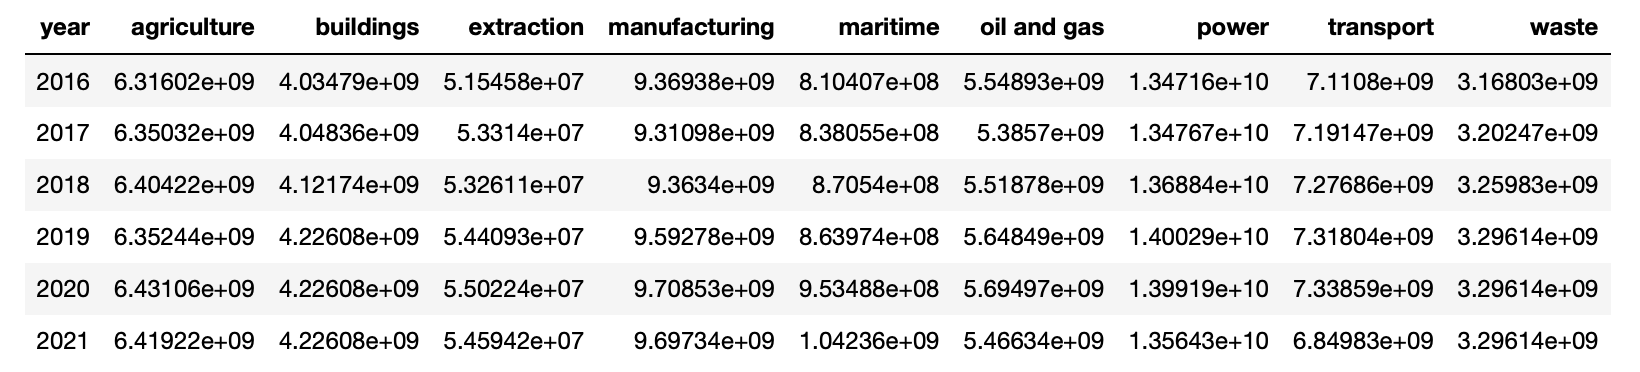

Check out [Chapter 8.3.3](https://inferentialthinking.com/chapters/08/3/Cross-Classifying_by_More_than_One_Variable.html?highlight=pivot) in the Data 8 textbook and the [documentation](http://data8.org/datascience/_autosummary/datascience.tables.Table.pivot.html) to learn more about how to use the `pivot` function.

In [14]:
agg_sectors = agg_sectors.pivot(..., ..., values = ...,collect=...)
agg_sectors

Now, let's visualize this myriad of data!

Create a line plot showing how the emissions change over the years (this is a time series!)

Check out [Chapter 7](https://inferentialthinking.com/chapters/07/3/Overlaid_Graphs.html) for more info on visualizations.

In [15]:
agg_sectors.plot(...)

plt.ylabel("emissions")
plt.title("Emissions per Sector over Time", y=1.05)

What sectors are the top three most significant ghg emissions output? Why do you think this is the case? Where do you believe we have the biggest potential impact to reduce ghg emissions?


*Your answer here*

# Greenhouse Gas Subsector Analysis

As you might have guessed, we are heading even deeper into our data! Similar to last lab, we are looking into the different subsectors. Let's go!

In the cell below, select the `sector`, `subsector`, `year`,and `emissions` columns.

In [16]:
agg_subsectors = ghg_emissions...([...,...,...,...])
agg_subsectors

**Create a table that contains emissions data ONLY for the sector with the largest emissions.**

Hint: look at your line plot from above. The name of the table should be that sector in lower case. If you don't get this part right, things might work furthe down so please be attentive.

In [17]:
...

Here comes a challenge: 

Use the `group` and `pivot` functions to create a table with representing the year and the subsectors that make up the sector with the largest emissions.



In [20]:
power = power.group(...,...)
power = power.pivot(..., ..., values = ..., collect=...)
power

Now fill out the cell below to create a line plot visualizing emissions over time for each subsector in the sector with the most emissions. Give the plot an appropriate title.

In [21]:
...
plt.ylabel("emissions")
plt.title("...", y=1.05)

In a sentence or two, what's the main takeaways from both this plot and the whole analysis that you performed?

*Your answer here*

Also, how do you feel about the class so far? Are things as expected? Do you have enough support? Is there any way we could make this a better learning experience for you?

*You thoughts here*

In [40]:
#Just run this cell. If it does not work, it might be something with your local code environment that we did not account for.
#This will not affect your grade!

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

def select_sector(sector):
    sector = agg_subsectors.where("sector", sector)
    sector = sector.group(["sector", "subsector", "year"], sum)
    sector = sector.pivot('subsector', 'year', values = "emissions sum",collect=sum)
    sector.plot('year')
    plt.ylabel("emissions")
    plt.title("Emissions per Subsector over Time", y=1.05)
    
    
sector_dropdown = widgets.Dropdown(options=sector_types,
                         value="power")
interact(select_sector, sector = sector_dropdown )

/Users/hansocampo/opt/anaconda3/lib/python3.8/site-packages/traitlets/traitlets.py:586: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  silent = bool(old_value == new_value)


interactive(children=(Dropdown(description='sector', index=6, options=('agriculture', 'buildings', 'extraction…

<function __main__.select_sector(sector)>

Congratulations of finishing Lab 5: Greenhouse Gas Emissions Over Time. You should be proud. This was a hard one!

*Developed by Caitlin Yee, Kinsey Long, Aaron Moore, Hans Ocampo, and Peter F. Grinde-Hollevik*